In [16]:
import matplotlib.pyplot as plt
from IPython.display import Audio
# import pyaudio
import numpy as np
# p = pyaudio.PyAudio()
from scipy.io.wavfile import write
from joblib import Parallel, delayed
from datetime import datetime

In [19]:
a = datetime.now()

datetime.now()

datetime.timedelta(-1, 86399, 999985)

In [ ]:
def draw_mp(i,di):
    
    pixels_in_line = 0
    pixels_per_line = []

    
    dr = (di / 2)

    for j in range(di):
        x = i - dr
        y = j - dr
        if np.abs(x **dg)+ np.abs(y **dg) <= dr ** dg:
            pixels_in_line += 1
        else:
            pass
    pixels_per_line.append(pixels_in_line)
    pixels_in_line = 0
    
    return pixels_per_line

n_jobs = 4
di = 4800
dg = .7

t1 = datetime.now()
results = Parallel(n_jobs=n_jobs)(delayed(draw_mp)(i,di) for i in range(di))
t2 = datetime.now()
td = t2 - t1
r = [i[0] for i in results]
r[:10], td.total_seconds()

In [ ]:
draw = pixels_per_line + list(np.array(pixels_per_line)*-1)
draw = [i if np.abs(i) < 720 else i / np.abs(i)**.3 for i  in draw ]
plt.plot(draw)


In [7]:
pixels_in_line = 0
pixels_per_line = []

diameter = int(input('Enter the diameter of the circle: '))

# You must account for the loops being zero-based, but the quotient of the diameter / 2 being
# one-based. If you use the exact radius, you will be short one column and one row.
offset_radius = (diameter / 2) - 0.5

for i in range(diameter):
    for j in range(diameter):
        x = i - offset_radius
        y = j - offset_radius
        if x * x + y * y <= offset_radius * offset_radius + 1:
#             print('*', end='  ')
            pixels_in_line += 1
        else:
            pass
#             print(' ', end='  ')
    pixels_per_line.append(pixels_in_line)
    pixels_in_line = 0
#     print()

Enter the diameter of the circle: 16000


880000 [2, 252, 358] [2, 252, 358]


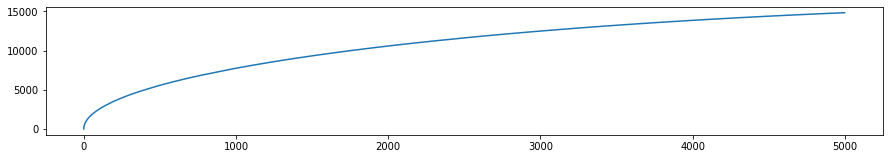

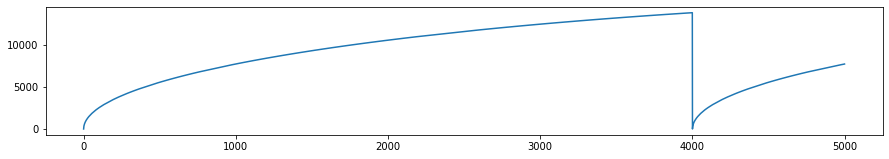

In [8]:

# plt.plot(pixels_per_line *10)

# samples_curve = pixels_per_line

# len(samples_curve)

samples_count = 882000

samples_curve = pixels_per_line * int(samples_count / len(pixels_per_line) )
samples_curve_ = pixels_per_line[:4000] * int(samples_count / len(pixels_per_line) ) * 4
# samples_curve_ = list(range(8000)) * int(samples_count / len(pixels_per_line) )

print(len(samples_curve), samples_curve[:3], samples_curve_[:3])

# samples_curve[:3]

samples_curve = np.array(samples_curve).astype(np.float32)
samples_curve_ = np.array(samples_curve_).astype(np.float32)

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(samples_curve[:5000])

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(samples_curve_[:5000])


samples_count 147000.0
samples_count 147000.0


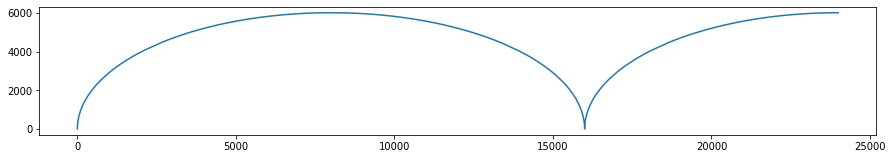

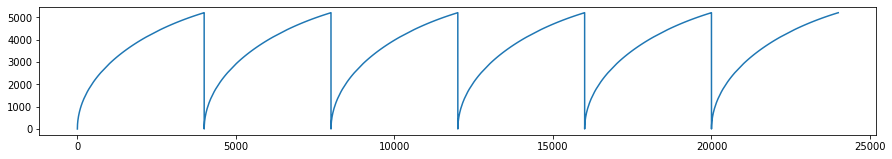

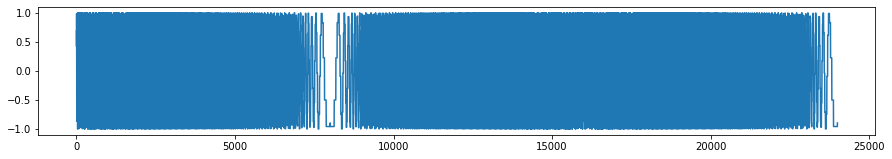

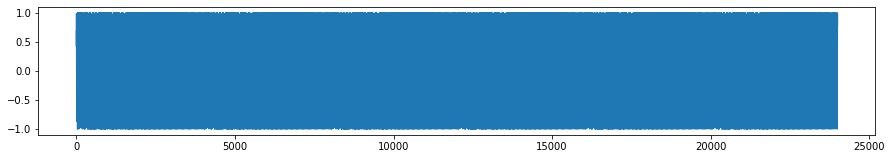

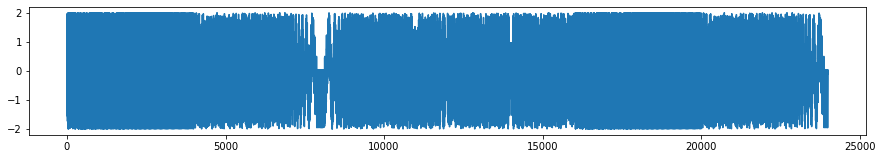

In [26]:
fs = 44100 / 6     # sampling rate, Hz, must be integer
duration = 20.0   # in seconds, may be float
f = 440 / 1  # sine frequency, Hz, may be float

# waveform = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs))

def get_core(samples_curve, f,fs,duration):
#     return [i % 50* i for i in 2*np.pi*np.arange(fs*duration)*f/fs]
    samples_count = fs*duration
    print('samples_count',samples_count)
#     samples_curve = np.array([i  for i in range(int(samples_count))])
#     print(samples_curve[:5])
    return [i for i in 2*np.pi*samples_curve*f/fs]

core = get_core(samples_curve, f,fs,duration)
core2 = get_core(samples_curve_,f,fs,duration)

waveform = np.sin(core)
waveform2 = np.sin(core2)
waveform_total = waveform + waveform2
waveform_total = waveform_total.astype(np.float32)


limit = 24000 

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(core[:limit])

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(core2[:limit])


plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(waveform[:limit])



plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(waveform2[:limit])

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(waveform_total[:limit])

Audio(waveform_total, rate=fs)

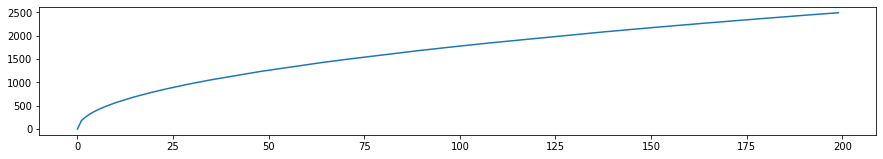

In [76]:
# def get_core(f,fs,duration):
# #     return [i % 10* i for i in 2*np.pi*np.arange(fs*duration)*f/fs]
#     print([np.arange(fs*duration)[0], np.arange(fs*duration)[-1]])
#     return [i for i in 2*np.pi*np.arange(fs*duration)*f/fs]

# def get_core_core(f,fs,duration):
#     return [i % i** i for i in 2*np.pi*np.arange(fs*duration)*f/fs]
# core = get_core(f,fs,duration)



plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(samples_curve[:200])

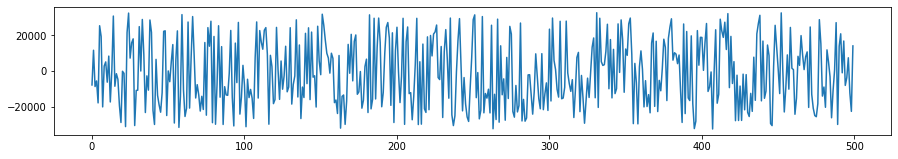

In [6]:
data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 32767)

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(scaled[:500])

In [20]:
Audio(waveform, rate=44100)

In [1]:
# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*samples)

stream.stop_stream()
stream.close()

p.terminate()

ModuleNotFoundError: No module named 'pyaudio'